## Aprendizaje por transferencia

En este notebook vamos a usar una red convolucional para entrenar un modelo con imágenes.

En la segunda parte, intentaremos mejorar este modelo usando aprendizaje por transferencia.

In [1]:
import tensorflow as tf
import numpy as np

tf.__version__

'2.0.0'

In [2]:
!python --version

Python 3.7.4


En este caso vamos a importar de Keras un dataset que contiene imágenes de números escritos a mano, con su correspondientes etiquetas.

In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


Nuestro objetivo con este dataset es distintguir entre los 0 y los 1, por lo que nos quedamos únicamente con las muestras que tienen esos valores

In [4]:
desired_index_train = np.where((y_train == 4) | (y_train == 9))
desired_index_test = np.where((y_test == 4) | (y_test == 9))

In [5]:
X_train_new_values = X_train[desired_index_train]
y_train_new_values = y_train[desired_index_train]
X_test_new_values = X_test[desired_index_test]
y_test_new_values = y_test[desired_index_test]

La nueva forma de nuestros datos.

In [6]:
print(X_train_new_values.shape)
print(y_train_new_values.shape)
print(X_test_new_values.shape)
print(y_test_new_values.shape)

(11791, 28, 28)
(11791,)
(1991, 28, 28)
(1991,)


In [7]:
y_train_new_values

array([4, 9, 4, ..., 4, 9, 9], dtype=uint8)

In [8]:
y_train_new_values[y_train_new_values == 4] = 0
y_train_new_values[y_train_new_values == 9] = 1
y_test_new_values[y_test_new_values == 4] = 0
y_test_new_values[y_test_new_values == 9] = 1

In [9]:
y_train_new_values

array([0, 1, 0, ..., 0, 1, 1], dtype=uint8)

Aquí podemos ver la primera imágen y la forma que tiene.

In [10]:
import matplotlib.pyplot as plt

first_image = X_train_new_values[0]
plt.imshow(first_image, cmap='gray')
first_label = y_train_new_values[0]
print(first_label)

0


In [11]:
print('Valor máximo de un pixel:', X_train_new_values.max())
print('Valor mínimo de un pixel:',X_train_new_values.min())

Valor máximo de un pixel: 255
Valor mínimo de un pixel: 0


Al igual que en el ejercicio sencillo, debemos estandarizar los datos para que preste la misma atención a cada una de las variables, o en este caso, cada uno de los pixeles

En este caso, como hemos visto que los valores van desde 0 a 255, dividimos entre 255 para obtener nuestros resultados entre 0 y 1.

In [12]:
X_train_scaled = X_train_new_values/255.
X_test_scaled = X_test_new_values/255.

In [13]:
print('Valor máximo de un pixel:', X_train_scaled.max())
print('Valor mínimo de un pixel:',X_test_scaled.min())

Valor máximo de un pixel: 1.0
Valor mínimo de un pixel: 0.0


Modificamos los datos, ya que al estar solamente en una dimension (blanco y negro) y no en 3 (como podria ser rgb), necesitamos añadirle una dimensión más a los datos para que la capa convoluiconal de dos dimensiones la acepte.

In [14]:
img_rows, img_cols = 28, 28

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], img_rows, img_cols, 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], img_rows, img_cols, 1)
input_shape_nn = (img_rows, img_cols, 1)

In [15]:
X_train_scaled

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

Y a continuación, como ya tenemos los datos, vamos a probar los distintos métodos. 

### Red convolucional simple

Creamos nuetsra red convolucional simple usando algunas de las capas que hemos visto como son maxpool o convolucionales

In [16]:
from keras import models, layers
model = models.Sequential()

In [17]:
# #Esta será nuestra capa de entrada
# input_shape_nn = (28, 28, 1)
# input_shape_nn

Ya podemos añadir al modelo las capas de una en una.

En este caso usamos una capa convolucional, con 16 filtros distintos y que usa un kernel de convolución de 3x3. Como función de actiación usamos una relu, ya que ayuda a regularizar y como inicialización de los pesos, usamos he_uniform que es uno de los reocmendados cuando se usa relu.

In [18]:
model.add(layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape = input_shape_nn))

In [19]:
model.add(layers.MaxPooling2D((2, 2)))

Cuando queremos terminar nuestro modelo, debemos trasnformar nuestros datos a una sola dimensión con el objetivo de hacer nuestras capas dense y nuestra última neurona de salida.

In [20]:
model.add(layers.Flatten())

In [21]:
model.add(layers.Dense(8, activation='relu', kernel_initializer='he_uniform'))

Importante: Añadir una última función de activación apropiada con nuestro problemas. En este caso, como queremos clasificar nuestros datos entre los que son 0 y 1, escogemos una sigmoide.

In [22]:
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 21640     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 21,809
Trainable params: 21,809
Non-trainable params: 0
_________________________________________________________________


Definimos los demás hiperparametros del modelo. Como optimizador usamos un gradiente descendiente estocastico (SGD) 
con un learning rate de 0.001. Para la función de error (loss), usamos la entropía cruzada que es de las 
más eficientes en los problemas de clasificación. Y por último para evaluar el modelo usaremos accuracy, que es simplemente el porcentaje de
muestras que acierta del total

In [24]:
from keras.optimizers import SGD
# compile model
optim = SGD(lr=0.001)
model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

Ahora ya se puede entrenar el modelo. En la siguiente linea se le pasa la opción *validation_split* = 0.2, lo que significa es que dividirá los datos de entrenamiento en 2, uno para entrenar los parametros y otro para monitorizar el rendimiento en un conjunto fuera de este.

In [25]:
history = model.fit(X_train_scaled, y_train_new_values, validation_split=0.2, epochs=30)

Train on 9432 samples, validate on 2359 samples
Epoch 1/30
9432/9432 [==============================] - 1s 141us/step - loss: 0.5084 - accuracy: 0.7946 - val_loss: 0.3439 - val_accuracy: 0.9152
Epoch 2/30
9432/9432 [==============================] - 1s 135us/step - loss: 0.2892 - accuracy: 0.9341 - val_loss: 0.2313 - val_accuracy: 0.9487
Epoch 3/30
9432/9432 [==============================] - 1s 135us/step - loss: 0.2132 - accuracy: 0.9509 - val_loss: 0.1810 - val_accuracy: 0.9606
Epoch 4/30
9432/9432 [==============================] - 1s 135us/step - loss: 0.1752 - accuracy: 0.9559 - val_loss: 0.1541 - val_accuracy: 0.9631
Epoch 5/30
9432/9432 [==============================] - 1s 135us/step - loss: 0.1526 - accuracy: 0.9591 - val_loss: 0.1367 - val_accuracy: 0.9631
Epoch 6/30
9432/9432 [==============================] - 1s 134us/step - loss: 0.1379 - accuracy: 0.9622 - val_loss: 0.1247 - val_accuracy: 0.9652
Epoch 7/30
9432/9432 [==============================] - 1s 135us/step - loss

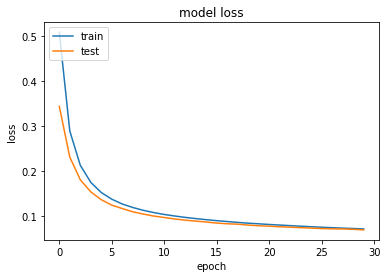

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Vemos como la función de perdida ha ido disminuyendo en cada época.

Por último estimemos el error en el futuro con el conjunto test

In [27]:
from sklearn.metrics import accuracy_score
prediccion = model.predict(X_test_scaled)

In [28]:
accuracy_score(y_test_new_values, np.round(prediccion))

0.9789050728277248

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_new_values, np.round(prediccion))

array([[958,  24],
       [ 18, 991]], dtype=int64)

En este caso hemos obtenido un 97.8% de aciertos, lo cuál esta muy bien. Sin embargo hay otras opciones que pueden ayudarnos a mejorar este resultado.

### Aprendizaje por transferencia

Tal y como se comenta en los apuntes, el aprendizaje por transferencia coge una red neuronal previamente entrenada y congela las primeras capas para no tener que volver a entrenarlas.

Por suerte, keras nos ofrece algunos modelos pre-entrenados que pueden ser muy útiles para estos casos:

En este caso, el modelo preentrenado necesita una entrada de imagenes con tres canales (en rgb), 
mientras que nuestras imagenes están en blanco y negro, por loq ue realizaremos unas pequeñas transformaciones para 
obtener los datos de forma que el modelo los pueda ingerir

In [30]:
X_train_scaled.shape

(11791, 28, 28, 1)

In [31]:
img_rows = 32
img_cols = 32

X_train_scaled_rgb = np.zeros(shape=(X_train_scaled.shape[0], img_rows, img_cols, 3))
for i in range(X_train_scaled.shape[0]):
    reshape_img = np.pad(X_train_scaled[i,:,:,0], (2,2), mode='edge')
#     reshape_img.shape
    X_train_scaled_rgb[i,:,:,0] = reshape_img
    X_train_scaled_rgb[i,:,:,1] = reshape_img
    X_train_scaled_rgb[i,:,:,2] = reshape_img

In [32]:
X_train_scaled_rgb.shape

(11791, 32, 32, 3)

In [33]:
X_test_scaled_rgb = np.zeros(shape=(X_test_scaled.shape[0], img_rows, img_cols, 3))
for i in range(X_test_scaled.shape[0]):
    reshape_img = np.pad(X_test_scaled[i,:,:,0], (2,2), mode='edge')
#     reshape_img.shape
    X_test_scaled_rgb[i,:,:,0] = reshape_img
    X_test_scaled_rgb[i,:,:,1] = reshape_img
    X_test_scaled_rgb[i,:,:,2] = reshape_img

In [34]:
X_test_scaled_rgb.shape

(1991, 32, 32, 3)

In [35]:
input_shape_nn = (img_rows, img_cols, 3)

Importamos el modelo VGG 16

In [36]:
from keras.applications.vgg16 import VGG16
model = models.Sequential()
conv_vgg = VGG16(include_top=False, weights='imagenet', input_shape=input_shape_nn)

Y esta es la estructura que presenta

In [37]:
conv_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

Lo que hacemos a continuación, es definir estas capas como no entrenables:

In [38]:
for layer in conv_vgg.layers:
    layer.trainable = False

Y por último, añadimos este modelo a nuestro modelo original como si fuera una capa más y creamos unas cuantas capas más que serán las que entrenaremos

In [39]:
model.add(conv_vgg)

In [40]:
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                8208      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 14,722,913
Trainable params: 8,225
Non-trainable params: 14,714,688
_________________________________________________________________


Como se puede observar en el resumen, ahora los parametros entrenables son 8k, mientras que los no entrenables son 14 M

In [42]:
from keras.optimizers import SGD
# compile model
optim = SGD(lr=0.001)
model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(X_train_scaled_rgb, y_train_new_values, validation_split=0.2, epochs=30)

Train on 9432 samples, validate on 2359 samples
Epoch 1/30
9432/9432 [==============================] - 32s 3ms/step - loss: 0.6520 - accuracy: 0.6868 - val_loss: 0.5966 - val_accuracy: 0.8538
Epoch 2/30
9432/9432 [==============================] - 32s 3ms/step - loss: 0.5697 - accuracy: 0.8713 - val_loss: 0.5290 - val_accuracy: 0.8949
Epoch 3/30
9432/9432 [==============================] - 30s 3ms/step - loss: 0.5082 - accuracy: 0.8982 - val_loss: 0.4679 - val_accuracy: 0.9114
Epoch 4/30
9432/9432 [==============================] - 32s 3ms/step - loss: 0.4521 - accuracy: 0.9123 - val_loss: 0.4128 - val_accuracy: 0.9190
Epoch 5/30
9432/9432 [==============================] - 33s 3ms/step - loss: 0.4015 - accuracy: 0.9220 - val_loss: 0.3649 - val_accuracy: 0.9258
Epoch 6/30
9432/9432 [==============================] - 33s 3ms/step - loss: 0.3571 - accuracy: 0.9299 - val_loss: 0.3226 - val_accuracy: 0.9343
Epoch 7/30
9432/9432 [==============================] - 33s 3ms/step - loss: 0.318

En este caso, al ser una red mucho más compleja que la mostrada arriba, los datos tienen que recorrer toda la red 
y tarda más en entrenarse. Sin embargo, este es un caso muy sencillo en el que es muy fácil obtener un resultado muy bueno.
De hecho, se puede observar que los resultados obtenidos son mejores, y no hemos tenido que estar probando distintas estructuras de la red.

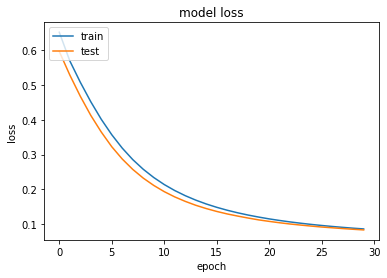

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Vemos como la función de perdida ha ido disminuyendo en cada época.

In [45]:
from sklearn.metrics import accuracy_score
prediccion = model.predict(X_test_scaled_rgb)

In [46]:
accuracy_score(y_test_new_values, np.round(prediccion))

0.9799095931692616

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_new_values, np.round(prediccion))

array([[974,   8],
       [ 32, 977]], dtype=int64)